### Teleportation

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator

# for plotting
from matplotlib import pyplot as plt

We will now create registers and the basic circuit where we will do all the operations

In [2]:
q_reg = QuantumRegister(3)
c_reg = ClassicalRegister(3)

# We have now created a blank QuantumCircuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(q_reg, c_reg)

In [3]:
# State Preparation
qc.h(0)
qc.barrier()
# Generating a bell pair
qc.h(1)
qc.cx(1, 2)
qc.barrier()
# Alice's operations
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.draw()
# measurement!
qc.measure(q_reg[0], c_reg[0])
qc.measure(q_reg[1], c_reg[1])
qc.barrier()
qc.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░ 
q1_0: ┤ H ├─░────────────░───■──┤ H ├─░─┤M├────░─
      └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ 
q1_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─
            ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ 
q1_2: ──────░──────┤ X ├─░────────────░──╫──╫──░─
            ░      └───┘ ░            ░  ║  ║  ░ 
c0: 3/═══════════════════════════════════╩══╩════
                                         0  1

We can now apply Bob's operations. In theory this completes the teleportation protocol! We however will add extra operations to verify that the teleportation was successful.

In [4]:
qc.z(2).c_if(c_reg[0], 1)
qc.x(2).c_if(c_reg[1], 1)
# verification
qc.measure(q_reg[2], c_reg[2])

qc.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░                            
q1_0: ┤ H ├─░────────────░───■──┤ H ├─░─┤M├────░────────────────────────────
      └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                            
q1_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░────────────────────────────
            ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░    ┌───┐       ┌───┐    ┌─┐
q1_2: ──────░──────┤ X ├─░────────────░──╫──╫──░────┤ Z ├───────┤ X ├────┤M├
            ░      └───┘ ░            ░  ║  ║  ░    └─╥─┘       └─╥─┘    └╥┘
                                         ║  ║    ┌────╨─────┐┌────╨─────┐ ║ 
c0: 3/═══════════════════════════════════╩══╩════╡ c0_0=0x1 ╞╡ c0_1=0x1 ╞═╩═
                                         0  1    └──────────┘└──────────┘ 2

Let us now run this circuit on a simulator to see how it worked, for this we will use the `AerSimulator` from Qiskit.

In [5]:
sim = AerSimulator()

# we run the circuit for 1024 shots, and ask it to save the memory
result = sim.run([qc], shots=1024, memory=True).result()
measurements = result.get_memory()
print(measurements)

['101', '111', '100', '110', '001', '110', '001', '100', '111', '111', '011', '101', '010', '110', '001', '100', '010', '010', '010', '000', '001', '110', '111', '001', '010', '001', '010', '000', '011', '110', '110', '000', '011', '000', '100', '100', '110', '001', '001', '100', '101', '111', '010', '111', '111', '110', '110', '110', '101', '010', '000', '110', '000', '101', '001', '101', '010', '111', '011', '100', '101', '001', '000', '100', '000', '010', '010', '011', '001', '000', '001', '010', '111', '110', '100', '010', '010', '110', '100', '100', '010', '100', '100', '001', '011', '101', '110', '010', '100', '101', '001', '001', '101', '011', '100', '110', '110', '011', '000', '011', '000', '011', '000', '111', '001', '001', '111', '111', '000', '101', '000', '110', '011', '100', '001', '011', '001', '111', '100', '101', '110', '011', '111', '111', '111', '110', '011', '000', '001', '000', '101', '010', '101', '100', '010', '101', '010', '111', '010', '001', '000', '100', '100'

In order to confirm our protocol has worked we need to check just the classical bit '2' (note not the 2nd bit but the bit at index 2) of the final statevector. We will now just extract those out and then print the histogram

(array([507., 517.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

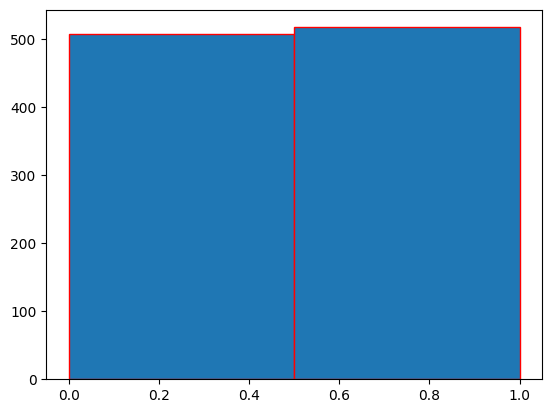

In [6]:
bit_2 = [int(measurements[i][2]) for i in range(len(measurements))]
plt.hist(bit_2, bins=2, edgecolor='r')

You can see we have obtained approximately equal probabilities for the states |0> and |1> which means the teleportation was successful. Naturally they are not exactly equal due to random chance. You can try running with more shots to see if the probabilities get closer to 0.5 each

Created on Qiskit 1.1.0 and Qiskit-Aer 0.14.2 by IIT Madras for Quantum Computing